# Predicting Solar Irradiance

- ### Robert Murphy
- ### July 11,2021

-----

![solar irradiance](https://pbs.twimg.com/media/DsofE-qX4AAOoSw.jpg)

# Imports:

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns

import matplotlib.pyplot as plt
import math
import explore
import prepare
import acquire
import requests


from scipy import stats
import explore
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import decimal as d

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

-----


# Pre-Planning:

- 1.) Initial run through of the DS pipeline. Will provide a basic MVP.
- 2.) Start by acquire dataset utilizing pandas read_csv.
- 3.) Prep work will be basic dropping of nulls and not worrying about outliers, will see if any datatypes need to be changed.
- 4.) Investigate any missing values also.
- 5.) Explore the dataset on unscaled data, the target variable will be radiation, will utilize univariate, bivariate and multivar.
- 6.) Will utilize feature engineering to see which features will be useful in prediciting solar irradiance.
- 6.) Target is continous so this will be a regression model.
- 7.) Will utilize 4 models and compare the performance, 
- 8.) Will evaluate on unscaled train, validate datasets.
- 9.) Will evluate test on best performing model
- 10.) Present findings and give a conclusion.
- 11.) If time permits will go back and deal with outliers and scaling.


-------

# Executive Summary:
- 2nd Degree Polynomial model outperformed the baseline and the other models.
- Visual comparison resulted in Tweedie Regressor Model correlated closure to the actual but decided to test on 2nd Degree Polynomial.
- The 2nd Degree Polynomial Model outperformed the baseline.

-----

# Issue:
- Hydrocarbons are a finite resource which in the future will become limited, as renewable resource technology continues to improve the solar irradiance levels will need to be predicted in order for an individual or company to know if the daily power supply will be sufficent.
- The main objective of this project is predicting the solar irradiance.

----

# Project goals:
- Find features for predicting solar irradiance
- Construct a Machine Learning regression model which accurately predicts solar irradiance.

-----

# Data Science Pipeline:
- Acquire the data.
- Prepare the data.
- Explore the data.
- Model & Evaluate.
- Findings and Recommendations.

-----

# Acquire:

### Note: Must acquire SolarPredictions.csv from kaggle website first before utilizing acquire.py. Link in README.md.

In [2]:
df = acquire.get_solar()

In [3]:
#32686 records x 11 fields
df.shape

(32686, 11)

In [4]:
#datatypes are int, float, and object.
# Right away can see time and dates which will possibly need to be changed to different data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [5]:
#brief look at the data.
df.head(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00
6,1475227519,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,112.45,6.75,06:13:00,18:13:00
7,1475227222,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,122.97,5.62,06:13:00,18:13:00
8,1475226922,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,101.18,4.50,06:13:00,18:13:00
9,1475226622,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,141.87,4.50,06:13:00,18:13:00


In [6]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


### Main Takeaways:
- Looking at the columns several of these will need to have th datatype changed.
- Radiation has a wide range of values, possibly outliers will need to be removed.
- Shape of the dataframe is 32686 Records x 11 Fields.
- Wind direction and time can be utilized in a bin. 

----

# Prepare:

In [7]:
explore.miss_dup_values(df)

Your selected dataframe has 11 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [8]:
df = prepare.prep_solar(df)

For solar_irradiance the lower bound is -528.2774999999999 and  upper bound is 883.7425
-----------------
Dataframe now has  30721 rows and  9 columns
For Temperature the lower bound is 34.0 and  upper bound is 66.0
-----------------
Dataframe now has  30625 rows and  9 columns
For Pressure the lower bound is 30.309999999999995 and  upper bound is 30.550000000000004
-----------------
Dataframe now has  28988 rows and  9 columns
For Humidity the lower bound is -4.5 and  upper bound is 159.5
-----------------
Dataframe now has  28988 rows and  9 columns
For WindDirection(Degrees) the lower bound is -44.35499999999999 and  upper bound is 309.525
-----------------
Dataframe now has  27395 rows and  9 columns
For Speed the lower bound is -3.38 and  upper bound is 14.620000000000001
-----------------
Dataframe now has  27146 rows and  9 columns


In [9]:
df.head()

,Date,solar_irradiance,Temperature,Pressure,Humidity,Speed,day,0.00-06.00,06.00-10.00,10.00-12.00,...,16.00-18.00,18.00--24.00,E,N,NE,NW,S,SE,SW,W
0,2016-09-29,1.21,48,30.46,59,5.62,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2016-09-29,1.21,48,30.46,58,3.37,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2016-09-29,1.23,48,30.46,57,3.37,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,2016-09-29,1.21,48,30.46,60,3.37,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,2016-09-29,1.17,48,30.46,62,5.62,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [10]:
train, validate, test = prepare.split_continuous(df)

train -> (15201, 22)
validate -> (6515, 22)
test -> (5430, 22)


### Main Takeaways:

- Did not need to drop any nulls, or values.
- Decided to not deal with outliers.
- Converted several columns to different datatypes, mainly dates was changed to datetime, then converted to obj to be combined to a float.
- Created a new column called day which states if the record was during the day with 1 being yes and 0 being no.
- Binned wind direction degrees into N,NE,S,SE,SW,W, NW,W.
- Binned time_of_day into time frames.




-------

# Explore:

In [11]:
train.columns

Index(['Date', 'solar_irradiance', 'Temperature', 'Pressure', 'Humidity',
       'Speed', 'day', '0.00-06.00', '06.00-10.00', '10.00-12.00',
       '12.00-14.00', '14.00-16.00', '16.00-18.00', '18.00--24.00', 'E', 'N',
       'NE', 'NW', 'S', 'SE', 'SW', 'W'],
      dtype='object')

In [12]:
quant_vars = ['Temperature', 'Pressure', 'Humidity', 'Speed', 'solar_irradiance']
cat_vars = ['day','0.00-06.00', '06.00-10.00', '10.00-12.00', '12.00-14.00',
       '14.00-16.00', '16.00-18.00', '18.00--24.00', 'E', 'N', 'NE', 'NW', 'S',
       'SE', 'SW', 'W']


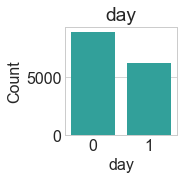

   day  Count  Percent
0    0   8953     58.9
1    1   6248     41.1
_________________________________________________________________


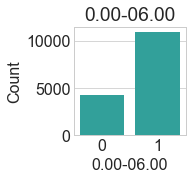

   0.00-06.00  Count  Percent
0           1  10963    72.12
1           0   4238    27.88
_________________________________________________________________


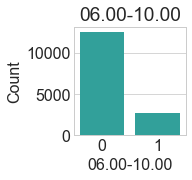

   06.00-10.00  Count  Percent
0            0  12529    82.42
1            1   2672    17.58
_________________________________________________________________


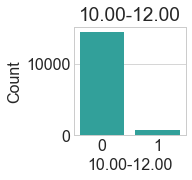

   10.00-12.00  Count  Percent
0            0  14435    94.96
1            1    766     5.04
_________________________________________________________________


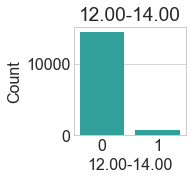

   12.00-14.00  Count  Percent
0            0  14446    95.03
1            1    755     4.97
_________________________________________________________________


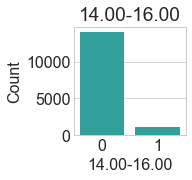

   14.00-16.00  Count  Percent
0            0  14059    92.49
1            1   1142     7.51
_________________________________________________________________


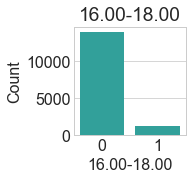

   16.00-18.00  Count  Percent
0            0  13934    91.67
1            1   1267     8.33
_________________________________________________________________


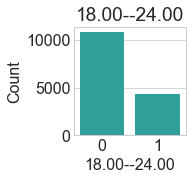

   18.00--24.00  Count  Percent
0             0  10840    71.31
1             1   4361    28.69
_________________________________________________________________


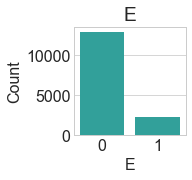

   E  Count  Percent
0  0  12941    85.13
1  1   2260    14.87
_________________________________________________________________


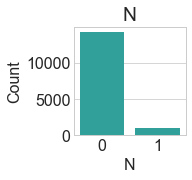

   N  Count  Percent
0  0  14259     93.8
1  1    942      6.2
_________________________________________________________________


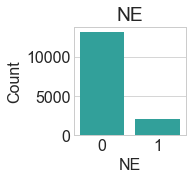

   NE  Count  Percent
0   0  13159    86.57
1   1   2042    13.43
_________________________________________________________________


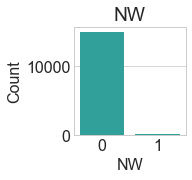

   NW  Count  Percent
0   0  15013    98.76
1   1    188     1.24
_________________________________________________________________


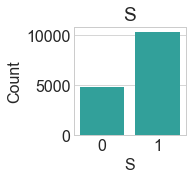

   S  Count  Percent
0  1  10365    68.19
1  0   4836    31.81
_________________________________________________________________


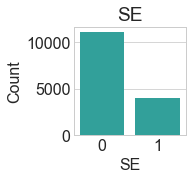

   SE  Count  Percent
0   0  11141    73.29
1   1   4060    26.71
_________________________________________________________________


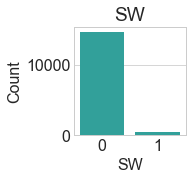

   SW  Count  Percent
0   0  14665    96.47
1   1    536     3.53
_________________________________________________________________


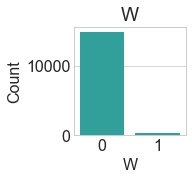

   W  Count  Percent
0  0  14864    97.78
1  1    337     2.22
_________________________________________________________________


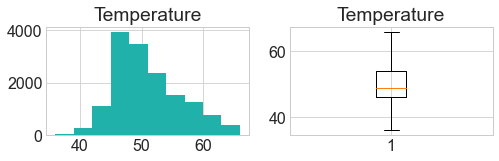

count    15201.000000
mean        50.366160
std          5.434127
min         36.000000
25%         46.000000
50%         49.000000
75%         54.000000
max         66.000000
Name: Temperature, dtype: float64


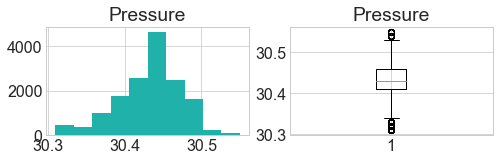

count    15201.000000
mean        30.430862
std          0.041421
min         30.310000
25%         30.410000
50%         30.430000
75%         30.460000
max         30.550000
Name: Pressure, dtype: float64


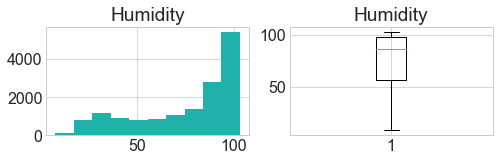

count    15201.000000
mean        75.729820
std         26.111176
min          8.000000
25%         56.000000
50%         86.000000
75%         98.000000
max        103.000000
Name: Humidity, dtype: float64


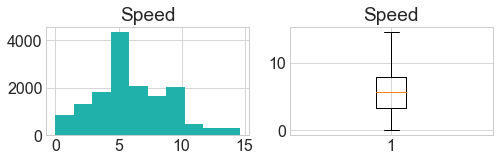

count    15201.000000
mean         6.036587
std          2.994391
min          0.000000
25%          3.370000
50%          5.620000
75%          7.870000
max         14.620000
Name: Speed, dtype: float64


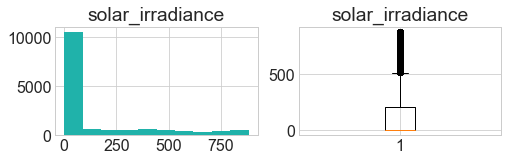

count    15201.000000
mean       146.105967
std        248.121851
min          1.130000
25%          1.220000
50%          1.300000
75%        207.900000
max        883.660000
Name: solar_irradiance, dtype: float64


In [13]:
#univariate exploration of each feature including target
explore.explore_univariate(train, cat_vars, quant_vars)

<AxesSubplot:xlabel='solar_irradiance', ylabel='Temperature'>

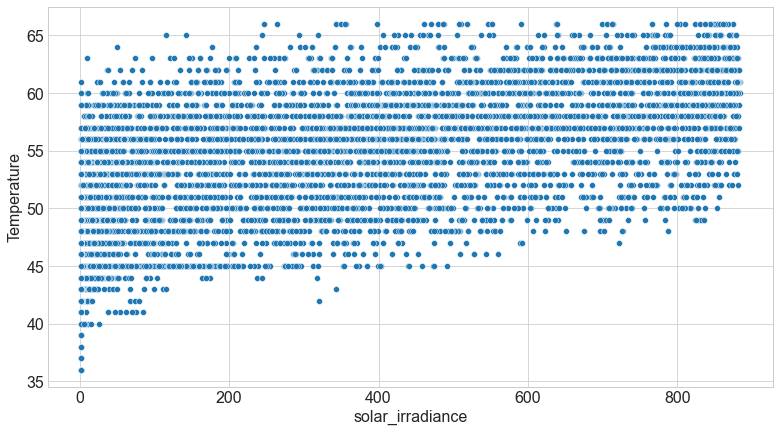

In [14]:
# looking at relationship of continous vs contiunous.
sns.scatterplot(x = "solar_irradiance", y = 'Temperature', data = train)

<AxesSubplot:xlabel='solar_irradiance', ylabel='Speed'>

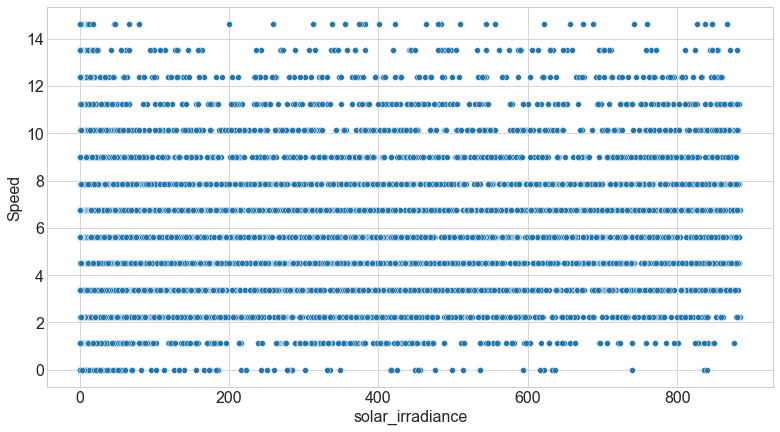

In [15]:
# relationship between continous vs continous
sns.scatterplot(x = "solar_irradiance", y = 'Speed', data = train)

<AxesSubplot:xlabel='solar_irradiance', ylabel='Pressure'>

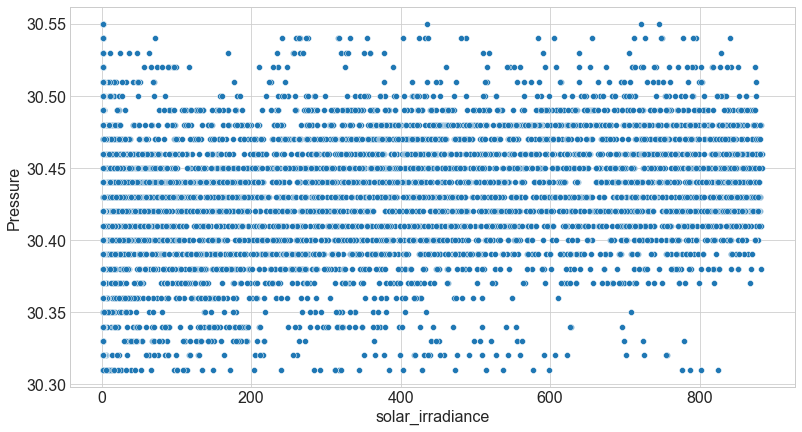

In [16]:
#relationship between continous vs continous
sns.scatterplot(x = "solar_irradiance", y = 'Pressure', data = train)

<AxesSubplot:xlabel='solar_irradiance', ylabel='Humidity'>

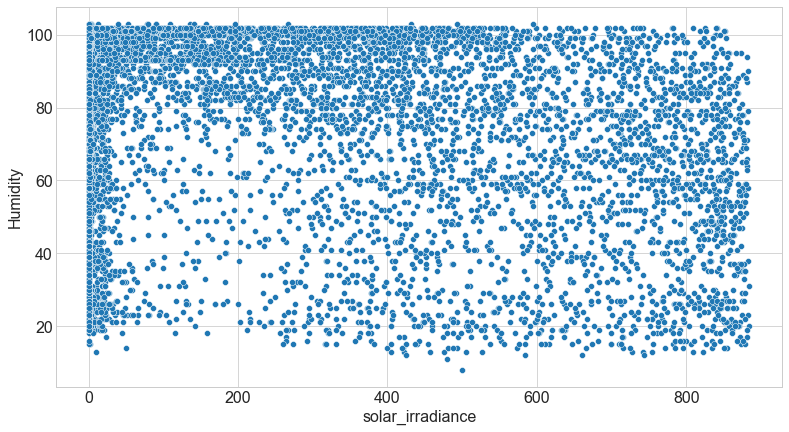

In [17]:
#relationship between continous vs continous
sns.scatterplot(x = "solar_irradiance", y = 'Humidity', data = train)

<AxesSubplot:title={'center':'Feautures  Correlating with solar_irradiance'}>

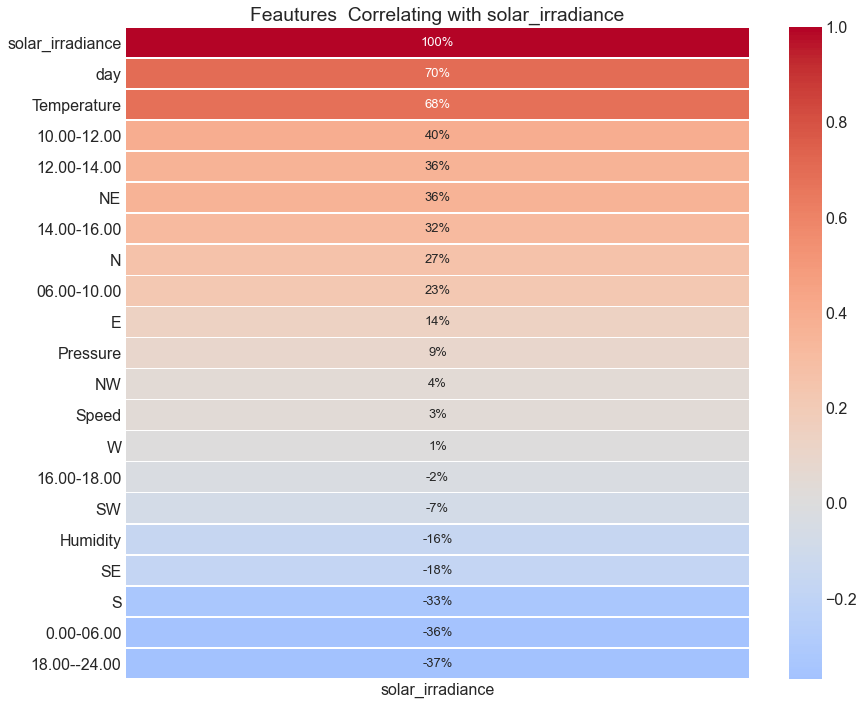

In [18]:
explore.get_heatmap(train, "solar_irradiance")

### Main Takeaways:

- Temperature is the only feature which visually appears normally distributed.
- Can see there is a linear correlation between radiation vs. temperature and radiation vs.pressure.
- Heatmap indicates several fatures have a decent correlation value to the target.
- Will utilize features which have correlation value of 20% or greater.

------

# Statistical Tests:

### Pearson Correlation:

 Pearson correlation coefficient is 0.6832736898109294, the corresponding p value is 0.0.
 We reject the null, and accept HA: there is a relationship between Temperature and Solar Irradiance


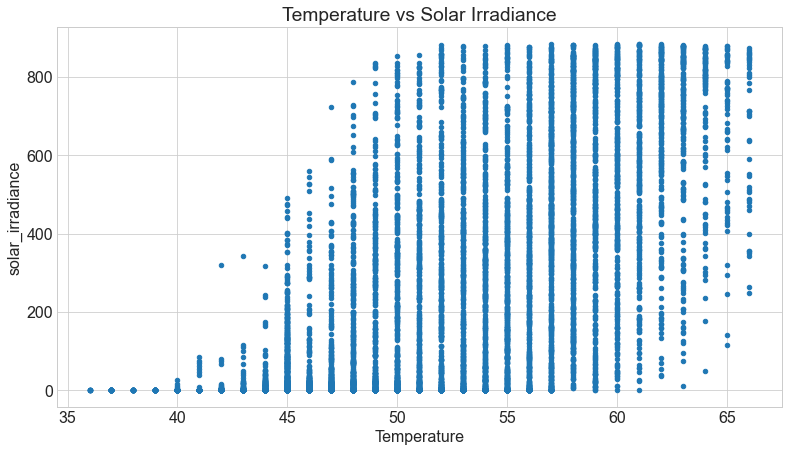

In [19]:
#Pearson Correlation

Hypothesis_null = 'there is no linear correlation between solar irradiance and Temperature'

alpha = 0.05

corr, p = stats.pearsonr(train.Temperature, train.solar_irradiance)
print(f' Pearson correlation coefficient is {corr}, the corresponding p value is {p}.')


train.plot.scatter('Temperature', 'solar_irradiance')
plt.title('Temperature vs Solar Irradiance')

if p < 0.05:
    print(' We reject the null, and accept HA: there is a relationship between Temperature and Solar Irradiance')
else:
    print(f' We accept null,  {Hypothesis_null}.')



 Pearson correlation coefficient is -0.15679365391892924, the corresponding p value is 2.8985536412818405e-84.
 We reject the null, and accept HA: there is a relationship


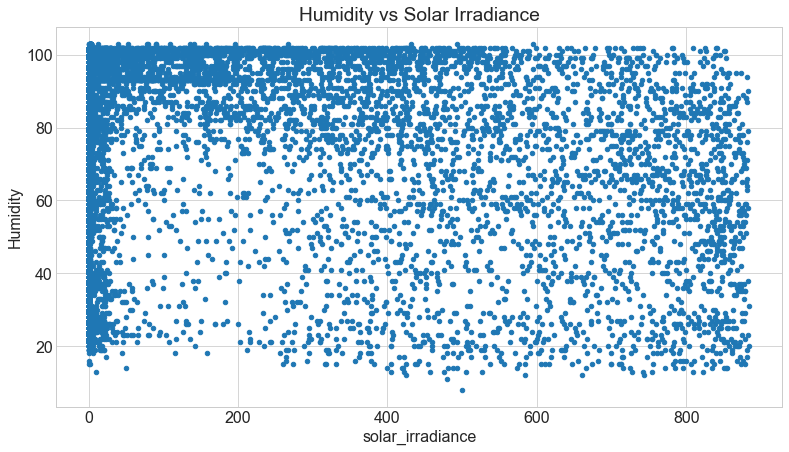

In [20]:
#Pearson Correlation

Hypothesis_null = 'there is no linear correlation between Solar Irradiance and Humidity'

alpha = 0.05

corr, p = stats.pearsonr(train.Humidity, train.solar_irradiance)
print(f' Pearson correlation coefficient is {corr}, the corresponding p value is {p}.')


train.plot.scatter('solar_irradiance', 'Humidity')
plt.title('Humidity vs Solar Irradiance')

if p < 0.05:
    print(' We reject the null, and accept HA: there is a relationship between Solar Irradiance and Humidity')
else:
    print(f' We accept null,  {Hypothesis_null}.')

 Pearson correlation coefficient is 0.09167492785271983, the corresponding p value is 9.784744169822427e-30.
 We reject the null, and accept HA: there is a relationship


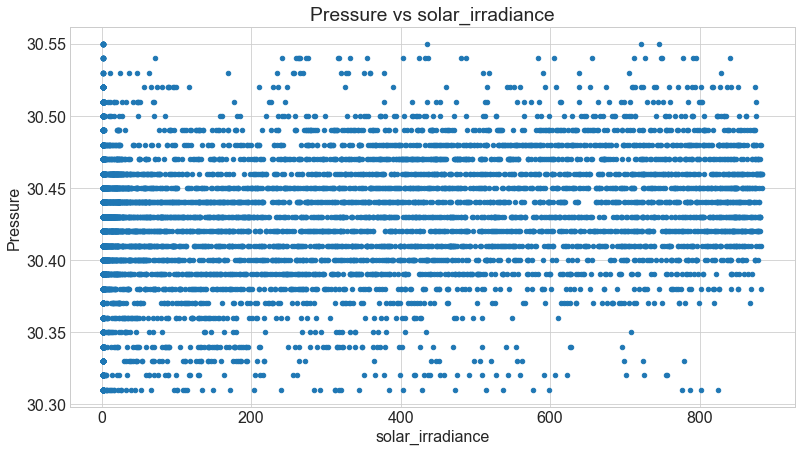

In [21]:
#Pearson Correlation

Hypothesis_null = 'there is no linear correlation between solar_irradiance and Pressure'

alpha = 0.05

corr, p = stats.pearsonr(train.Pressure, train.solar_irradiance)
print(f' Pearson correlation coefficient is {corr}, the corresponding p value is {p}.')


train.plot.scatter('solar_irradiance', 'Pressure')
plt.title('Pressure vs solar_irradiance')

if p < 0.05:
    print(' We reject the null, and accept HA: there is a linear correlation between solar_irradiance and Pressure)
else:
    print(f' We accept null,  {Hypothesis_null}.')

### TTest

In [22]:
#TTest
# make a subset 
x1 = train[train['10.00-12.00'] == 1].solar_irradiance
x2 = train[train['10.00-12.00'] != 1].solar_irradiance


# run a 2 sample, t-test
t_stat, p = stats.ttest_ind(x1,x2)

print(f'\nstatistic = {t_stat:.4f}')
print(f'p_value = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = 'There is no difference in solar irradiance for timeframe 10:00-12:00 and not in the timeframe 10:00-12:00'

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


statistic = 53.7374
p_value = 0.0000

We can reject the null hypothesis that There is no difference in solar irradiance for timeframe 10:00-12:00 and not in the timeframe 10:00-12:00


In [23]:
#TTest
# make a subset 
x1 = train[train['10.00-12.00'] == 1].solar_irradiance
x2 = train[train['06.00-10.00'] == 1].solar_irradiance


# run a 2 sample, t-test
t_stat, p = stats.ttest_ind(x1, x2)

print(f'\nstatistic = {t_stat:.4f}')
print(f'p_value = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = 'There is no significant difference in solar irradiance for time 10:00-12:00 and 06.00-10.00'

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


statistic = 29.1747
p_value = 0.0000

We can reject the null hypothesis that There is no difference in solar irradiance for time 10:00-12:00 and 06.00-10.00


In [24]:
#TTest
# make a subset 
x = N_wind_radiation = train[train.N == 1].solar_irradiance
x1 = overall_radiation_mean = train.solar_irradiance.mean()


# run a 1 sample, t-test
t_stat, p = stats.ttest_1samp(x,x1)

print(f'\nstatistic = {t_stat:.4f}')
print(f'p_value = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = 'There is no significant difference in solar irradiance for winds blowing N mean and the overal population mean.'

if p/2 < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


statistic = 27.4000
p_value = 0.0000

We can reject the null hypothesis that There is no significant difference in solar irradiance for winds blowing N mean and the overal population mean.


In [25]:
#will only utilize features with 20% correlation or better.



### Main Takeaways:
- Investigated if several continuous features had a linear correlation with the continuous.
- For each pearson r test, the null hypothesis was rejected.
- Investigated the categorical variables with the continuous variable target, utilized a Ttest.
- For each Ttest the null hypotheis was rejected.
- The results from the tests performed lead to the conclusion that a majority of the features would be useful in modeling.

# Modeling:

In [26]:
#specifying target and cols
cols = ['Temperature', 'Pressure', 'Humidity', 'Speed',
       'day', '06.00-10.00','0.00-06.00','18.00--24.00',
       '10.00-12.00', '12.00-14.00', '14.00-16.00',
       'E', 'N', 'NE','S',
       'SE']
target = 'solar_irradiance'

In [27]:
#creating X-train which includes features with target excluded. Did the same for test and validate
X_train, y_train = train[cols], train[target]
X_validate, y_validate = validate[cols], validate[target]
X_test, y_test = test[cols], test[target]

-----

## Baseline Mean or Median Utilization

In [28]:
# y_train and y_validate have to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict radiation_pred_mean
radiation_pred_mean = y_train.solar_irradiance.mean()
y_train['radiation_pred_mean'] = radiation_pred_mean
y_validate['radiation_pred_mean'] = radiation_pred_mean 

# 2. compute radiation_pred_median
radiation_median = y_train.solar_irradiance.median()
y_train['radiation_pred_med'] = radiation_median
y_validate['radiation_pred_med'] = radiation_median 

#Evaluate the baseline model using the mean
#RMSE of radiation_pred_mean
baseline_RMSE = mean_squared_error(y_train.solar_irradiance, y_train.radiation_pred_mean) ** .5
baseline_val_RMSE = mean_squared_error(y_validate.solar_irradiance, y_validate.radiation_pred_mean) ** .5

print("RMSE using Mean\nTrain/In-Sample: ", round(baseline_RMSE, 2),
      "\nValidate/Out-of-Sample: ", round(baseline_val_RMSE, 2))

#Evaluate the baseline model using the median
#RMSE of log_error_pred_mean
baseline_rmse_train_median = mean_squared_error(y_train.solar_irradiance, y_train.radiation_pred_med) ** .5
baseline_rmse_validate_median = mean_squared_error(y_validate.solar_irradiance, y_validate.radiation_pred_med) ** .5

print("RMSE using Median\nTrain/In-Sample: ", round(baseline_rmse_train_median, 2), 
      "\nValidate/Out-of-Sample: ", round(baseline_rmse_validate_median, 2))

RMSE using Mean
Train/In-Sample:  248.11 
Validate/Out-of-Sample:  243.54
RMSE using Median
Train/In-Sample:  287.28 
Validate/Out-of-Sample:  282.13


## Baseline Prediction

In [29]:
# Baseline prediction will utilize mean, RMSE value for mean was better than median.
# Have stated our baseline accuracy for the model to beatr in order to be considered valid.
baseline = y_train.solar_irradiance.mean()
y_train['baseline'] = baseline

In [30]:
# Baseline RMSE calculation.
baseline_RMSE = math.sqrt(mean_squared_error(y_train.solar_irradiance, y_train.baseline))
print(f'Train RMSE Baseline {round(baseline_RMSE,2)}.')

Train RMSE Baseline 248.11.


### Baseline Takeaways:
- Mean and median RMSE values are not equal, will set baseline to Radiation mean. 

-----

## Model 1: Linear Regression

In [31]:
# create the model object
linear_model = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
linear_model.fit(X_train, y_train.solar_irradiance)

# predict train
y_train['solar_irradiance_predict_lm'] = linear_model.predict(X_train)

# evaluate: rmse
rmse_train_lr = mean_squared_error(y_train.solar_irradiance, y_train.solar_irradiance_predict_lm)**(1/2)

# predict validate
y_validate['solar_irradiance_predict_lm'] = linear_model.predict(X_validate)

# evaluate: rmse
rmse_validate_lr = mean_squared_error(y_validate.solar_irradiance, y_validate.solar_irradiance_predict_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", round(rmse_train_lr,2), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate_lr,2),
      "\nBaseline RMSE value is ", round(baseline_RMSE,2))
evs_lr = explained_variance_score(y_train.solar_irradiance, y_train.solar_irradiance_predict_lm)
print('Explained Variance Linear Regression Model = ', round(evs_lr,2))

RMSE for OLS using LinearRegression
Training/In-Sample:  127.74 
Validation/Out-of-Sample:  128.18 
Baseline RMSE value is  248.11
Explained Variance Linear Regression Model =  0.73


### OLS Linear Regression Model Takeaway:
- The RMSE values for the training and validate differ by 1 Wm^2, train is less than validate so the model is not overfit.
- So due to the RMSE value representing watts, I feel comfortable in saying this is an exceptable model.
- Train out performed the baseline, as did the validate, so the model is valid and useful in predicting solar irradiance.

## Model 2 : Polynomial

In [32]:
# make the polynomial features to get a new set of features
poly_feat = PolynomialFeatures(degree=2)

# fit and transform X_train
X_train_degree2 = poly_feat.fit_transform(X_train)

# transform X_validate & X_test
X_validate_degree2 = poly_feat.transform(X_validate)
X_test_degree2 = poly_feat.transform(X_test)

X_train_degree2.shape, X_validate_degree2.shape, X_test_degree2.shape

((15201, 153), (6515, 153), (5430, 153))

In [33]:
# create the model object
linear_model2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
linear_model2.fit(X_train_degree2, y_train.solar_irradiance)

# predict train
y_train['solar_irradiance_predict_linear_model2'] = linear_model2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_poly = mean_squared_error(y_train.solar_irradiance, y_train.solar_irradiance_predict_linear_model2)**(1/2)

# predict validate
y_validate['solar_irradiance_predict_linear_model2'] = linear_model2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_poly = mean_squared_error(y_validate.solar_irradiance, y_validate.solar_irradiance_predict_linear_model2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", round(rmse_train_poly,2),
      "\nValidation/Out-of-Sample: ", round(rmse_validate_poly,2), 
      "\nBaseline RMSE value is ", round(baseline_RMSE,2))
evs_poly = explained_variance_score(y_train.solar_irradiance, y_train.solar_irradiance_predict_linear_model2)
print('Explained Variance Polynomial Model = ', round(evs_poly,2))

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  102.1 
Validation/Out-of-Sample:  102.12 
Baseline RMSE value is  248.11
Explained Variance Polynomial Model =  0.83


### Polynomial Model Takeaway:
    
- Polynomial performed better than regression.
- Model is slightly overfit but the model performed better than the baseline so it is valid.

## Model 3: Lasso Lars 

In [34]:
# create the model object
lars_model = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars_model.fit(X_train, y_train.solar_irradiance)

# predict train
y_train['solar_irradiance_prediction_lars'] = lars_model.predict(X_train)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.solar_irradiance, y_train.solar_irradiance_prediction_lars)**(1/2)

# predict validate
y_validate['solar_irradiance_prediction_lars'] = lars_model.predict(X_validate)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.solar_irradiance, y_validate.solar_irradiance_prediction_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", round(rmse_train_lars,2), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate_lars,2),
      "\nBaseline RMSE value is ", round(baseline_RMSE,2))
evs_lars = explained_variance_score(y_train.solar_irradiance, y_train.solar_irradiance_prediction_lars)
print('Explained Variance Linear Regression Model = ', round(evs_lars,3))

RMSE for Lasso + Lars
Training/In-Sample:  209.33 
Validation/Out-of-Sample:  205.36 
Baseline RMSE value is  248.11
Explained Variance Linear Regression Model =  0.288


### Lasso Lars Model Takeaway:
    
- Lasso Lars is the worst performing model so far.
- Model is slightly overfit but the model performed better than the baseline so it is valid.

## Model 4: Tweedie Regressor

In [35]:
# create the model object
glm = TweedieRegressor(alpha=0, power = 1)

# fit the model to our training data. 
glm.fit(X_train, y_train.solar_irradiance)


# predict train
y_train['solar_irradiance_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.solar_irradiance, y_train.solar_irradiance_pred_glm) ** (1/2)


# predict validate
y_validate['solar_irradiance_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_train.solar_irradiance, y_train.solar_irradiance_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=0 & alpha=0\nTraining/In-Sample: ", round(rmse_train,2), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate,2),
     "\nBaseline RMSE value is ", round(baseline_RMSE,2))
evs_glm = explained_variance_score(y_train.solar_irradiance, y_train.solar_irradiance_pred_glm)
print('Explained Variance Linear Regression Model = ', round(evs_glm,3))

RMSE for GLM using Tweedie, power=0 & alpha=0
Training/In-Sample:  119.87 
Validation/Out-of-Sample:  119.87 
Baseline RMSE value is  248.11
Explained Variance Linear Regression Model =  0.767


### Tweedie Regressor Model Takeaway:
    
- Polynomial performed better than the Tweedie Regressor by 17 Wm^2.
- Model is was not overfit and performed better than the baseline.

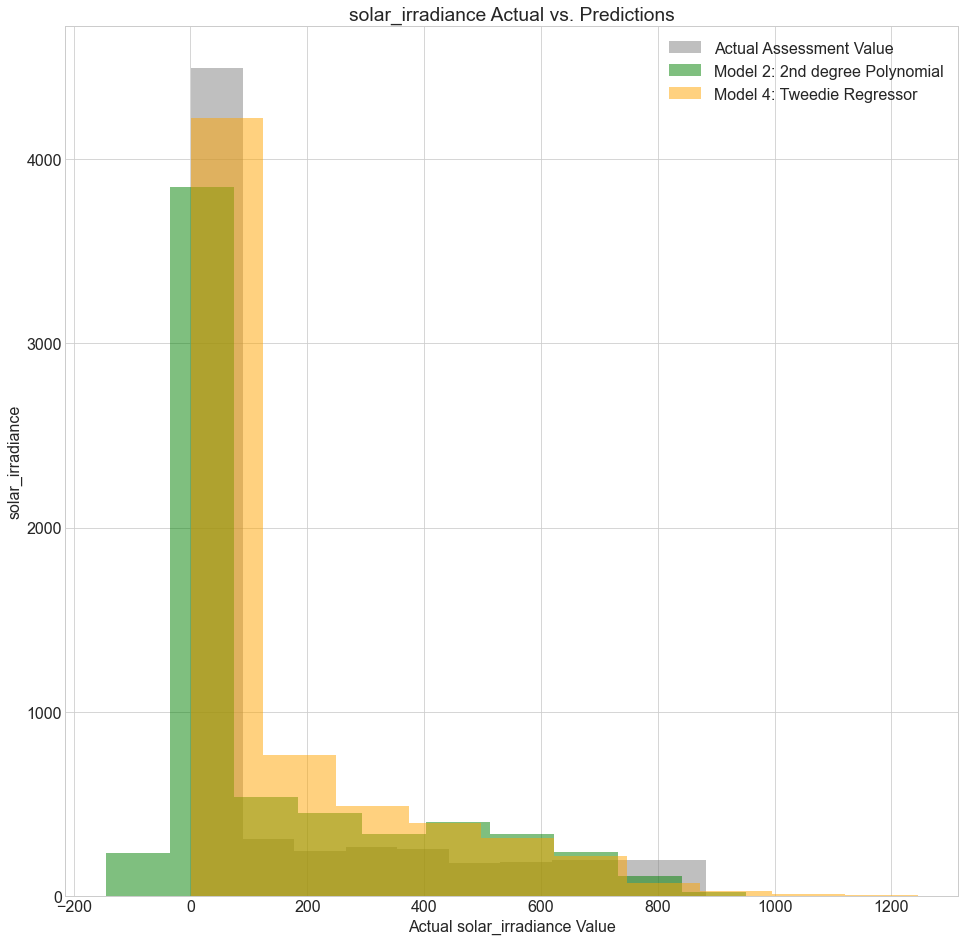

In [36]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,16))
plt.hist(y_validate.solar_irradiance, color='grey', alpha=.5, label="Actual Assessment Value")
plt.hist(y_validate.solar_irradiance_predict_linear_model2, alpha=.5, color="green", label="Model 2: 2nd degree Polynomial")
plt.hist(y_validate.solar_irradiance_pred_glm, alpha=.5, color="orange", label="Model 4: Tweedie Regressor")
plt.xlabel("Actual solar_irradiance Value")
plt.ylabel("solar_irradiance")
plt.title("solar_irradiance Actual vs. Predictions")
plt.legend()
plt.show()

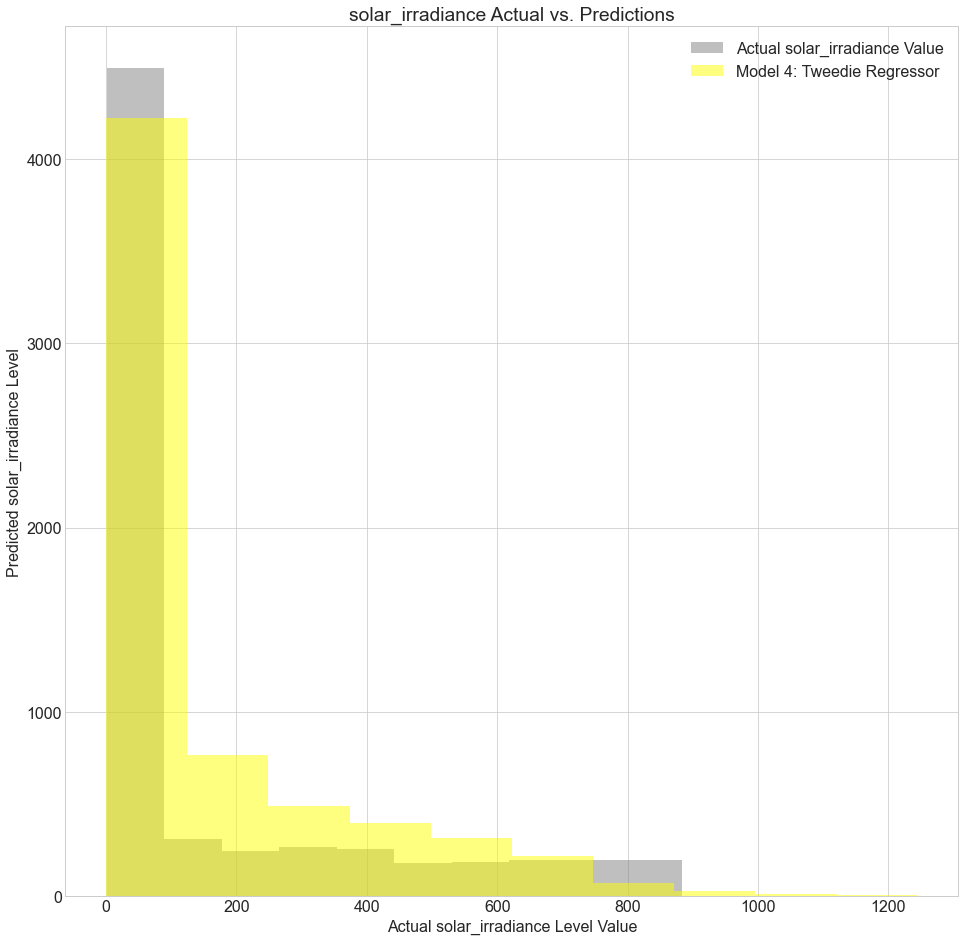

In [44]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,16))
plt.hist(y_validate.solar_irradiance, color='grey', alpha=.5, label="Actual solar_irradiance Value")

plt.hist(y_validate.solar_irradiance_pred_glm, alpha=.5, color="yellow", label="Model 4: Tweedie Regressor")

plt.xlabel("Actual solar_irradiance Level Value")
plt.ylabel("Predicted solar_irradiance Level")
plt.title("solar_irradiance Actual vs. Predictions")
plt.legend()
plt.show()

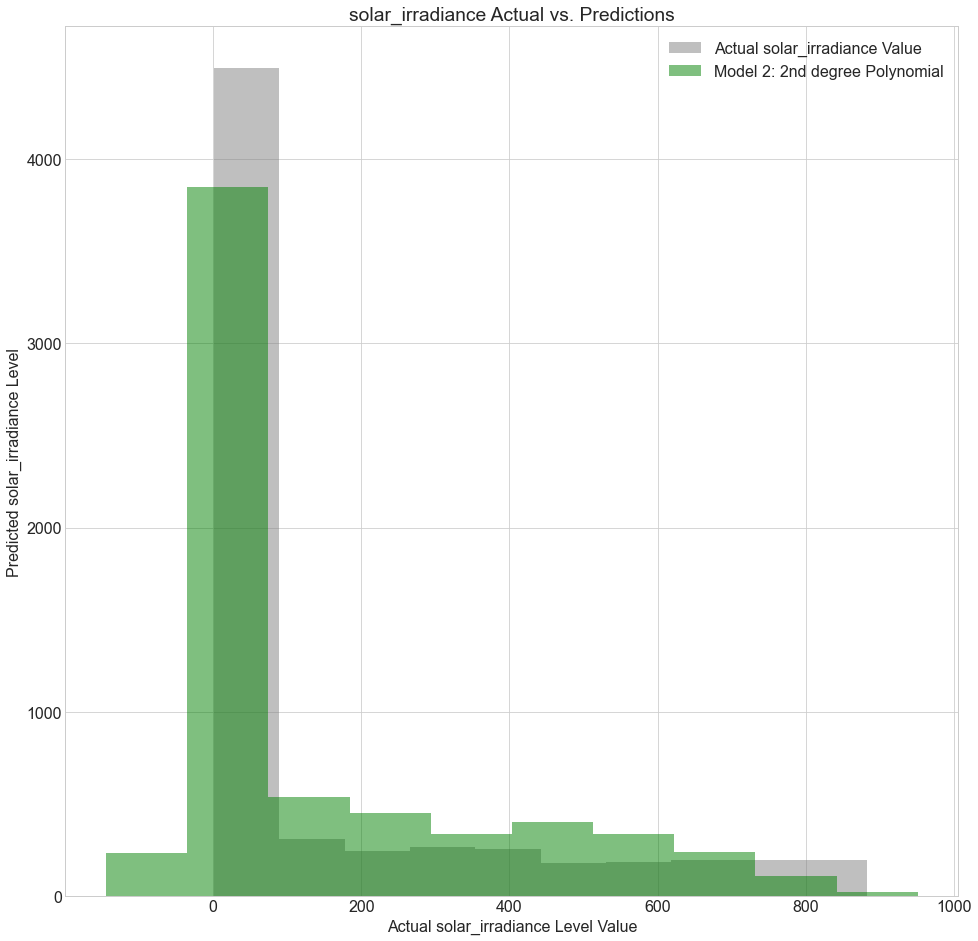

In [45]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,16))
plt.hist(y_validate.solar_irradiance, color='grey', alpha=.5, label="Actual solar_irradiance Value")

plt.hist(y_validate.solar_irradiance_predict_linear_model2, alpha=.5, color="green", label="Model 2: 2nd degree Polynomial")

plt.xlabel("Actual solar_irradiance Level Value")
plt.ylabel("Predicted solar_irradiance Level")
plt.title("solar_irradiance Actual vs. Predictions")
plt.legend()
plt.show()

## Main Takeaway:
- The best perfoming model was the 2nd Degree Polynomial Regressor.
- The model was not overfit with a train: 102 Wm^2 and validate 102 Wm^2.
- The last visualization show that Tweedie Regressor has the best fit to the actual.
- Will evaluate on the test dataset using 2nd Degree Polynomial Regressor..



----

# Evaluate on Test:

In [42]:
# create the model object
# predict train
# create dataframe
y_test = pd.DataFrame(y_test)
# use the model to make predictions
y_test['solar_irradiance_predict_test_linear2'] = linear_model2.predict(X_test_degree2)

# evaluate: rmse
rmse_test_poly = mean_squared_error(y_test.solar_irradiance, y_test.solar_irradiance_predict_test_linear2)**(1/2)


print("\nTest/Out-of-Sample: ", rmse_test_poly,
      "\nBaseline RMSE value is ", baseline_RMSE)
evs_poly_test = explained_variance_score(y_test.solar_irradiance, y_test.solar_irradiance_predict_test_linear2)
print('Explained Variance Polynomial Model = ', round(evs_poly_test,3))




Test/Out-of-Sample:  101.66001972024175 
Baseline RMSE value is  248.1136896885028
Explained Variance Polynomial Model =  0.832


## Main Takeaway:
- The model outperformed the baseline, so the model is valid.


----

# Conclusions:

- Utilized features which had a correlation value >= 20% within a model to predict radiation levels.
- 2nd Degree Polynomial had lowest validate RMSE value: 124 Wm^2 and performed better than the baseline. However after reviewing the visualizations of the models against the actual, came to the conclusion that Polynomial was overfitting and decided upon Tweedie Regressor.
- Evaluted the test dataset on the Tweedie Regressor Model, the model performed better than the baseline.
- With more time I would utilize feature engineering, and clustering which could result in improvement of the model. 


-------